<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, utils, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist

In [3]:
# hyperparameters (실험변경 편의를 위하여 상단에 기재하였음)
batch_size = 100
epochs = 10
learning_rate = 0.1
dropout_rate = 0.1
patience = 5

In [4]:
# input image dimensions, output dimension
img_rows, img_cols = 28, 28
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  # 이미지 개수, 행, 열, 흑백(1채널)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(dropout_rate))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
# compile model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy'])

# train model
early_stop = EarlyStopping(monitor = 'val_loss', patience = patience, mode='min')
hist = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          validation_split = 0.2,
          callbacks = [early_stop],
          shuffle = True,
          verbose = 1)

Epoch 1/10
480/480 [==============================] - 14s 6ms/step - loss: 0.3459 - accuracy: 0.8919 - val_loss: 0.0913 - val_accuracy: 0.9738
Epoch 2/10
480/480 [==============================] - 3s 6ms/step - loss: 0.1074 - accuracy: 0.9669 - val_loss: 0.0627 - val_accuracy: 0.9814
Epoch 3/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0784 - accuracy: 0.9764 - val_loss: 0.0481 - val_accuracy: 0.9851
Epoch 4/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0637 - accuracy: 0.9803 - val_loss: 0.0491 - val_accuracy: 0.9854
Epoch 5/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0494 - val_accuracy: 0.9854
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0390 - val_accuracy: 0.9885
Epoch 7/10
480/480 [==============================] - 3s 7ms/step - loss: 0.0407 - accuracy: 0.9873 - val_loss: 0.0367 - val_accuracy: 0.9893
Epoch

"Epoch 3/10"의 의미는?

"38s 77ms/step"의 의미는?

"loss: 0.1105 - accuracy: 0.9666 - val_loss: 0.0624 - val_accuracy: 0.9827"의 의미는?

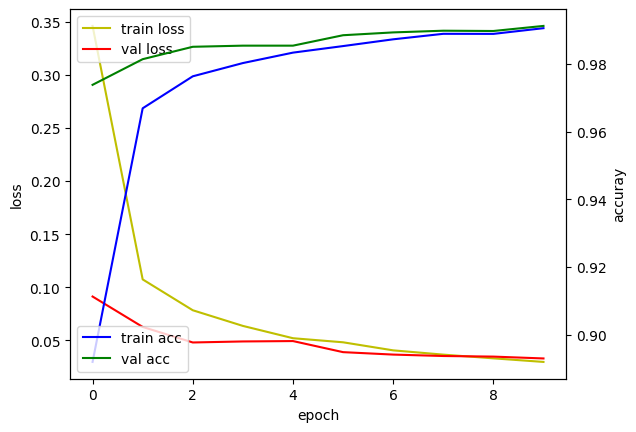

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [9]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose = 1)
print('test_loss:', round(score[0], 4))
print('test_acc:', round(score[1], 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0282 - accuracy: 0.9908
test_loss: 0.0282
test_acc: 0.9908


In [11]:
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/CNN/"  ### [중요!!] Colab의 경우, 파일을 저장할 위치를 기록하시오.
model.save(dir + "cnn_mnist.h5")
model.save(dir + "cnn_mnist.keras")